In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

import sys
import os

sys.path.append(os.path.abspath(".."))  # Adds project root to Python path
sys.path.append(os.path.abspath("."))  # Adds current directory to Python path


In [19]:

# Load Dataset
df = pd.read_csv("../WEEK1/data/data.csv", encoding='ISO-8859-1', engine='python')
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [20]:
# Initial Exploration
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [21]:
# Drop Irrelevant Columns (optional)
df.drop(columns=['pm2_5', 'stn_code', 'agency', 'location_monitoring_station'], inplace=True, errors='ignore')


In [22]:
# Focus on Key Pollutants
df_pollutants = df[['so2', 'no2', 'spm']].dropna()


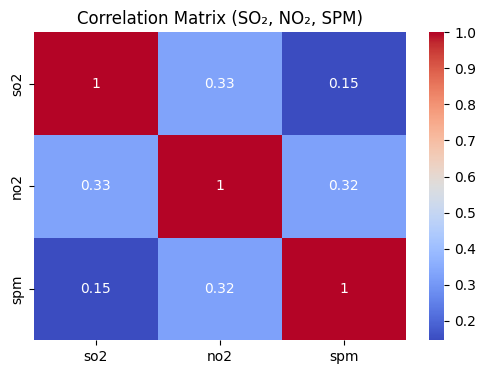

In [23]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_pollutants.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (SO₂, NO₂, SPM)")
plt.show()


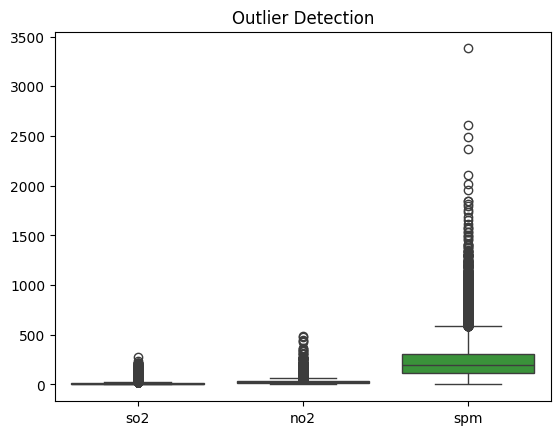

In [24]:
# Outlier Detection
sns.boxplot(data=df_pollutants[['so2', 'no2', 'spm']])
plt.title("Outlier Detection")
plt.show()


In [25]:
# Model Training
X = df_pollutants[['so2', 'no2']]
y = df_pollutants['spm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Model Evaluation
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.1055
Mean Squared Error: 21546.16


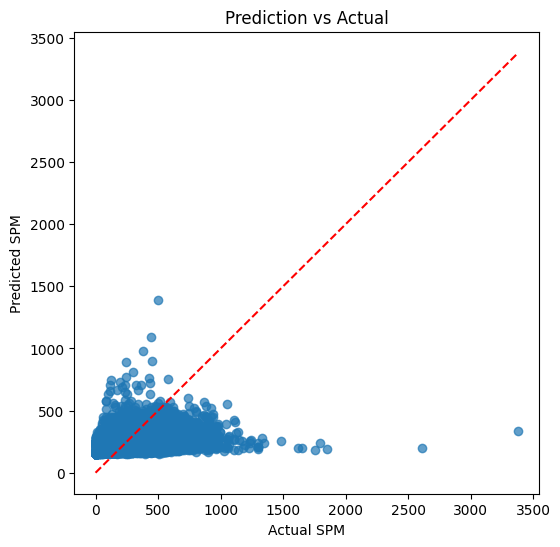

In [27]:
# Prediction vs Actual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual SPM")
plt.ylabel("Predicted SPM")
plt.title("Prediction vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [28]:
# 💾 Save the Model
joblib.dump(model, "../WEEK2/linear_regression_model.pkl")
print("Model saved successfully.")


Model saved successfully.
